#HW5 N-step TD method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 

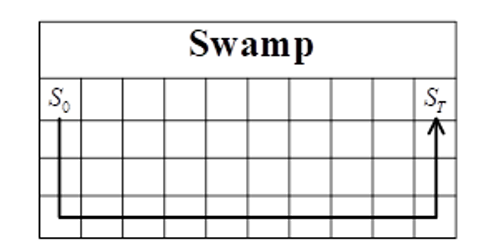

1-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1$$
3-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1\rightarrow A_1 \rightarrow R_1,S_2\rightarrow A_2 \rightarrow R_2,S_3$$
$$S_{T-3}\rightarrow A_{T-3} \rightarrow R_{T-3},S_{T-2}\rightarrow A_{T-2} \rightarrow R_{T-2},S_{T-1}\rightarrow A_{T-1} \rightarrow R_{T-1},S_T$$


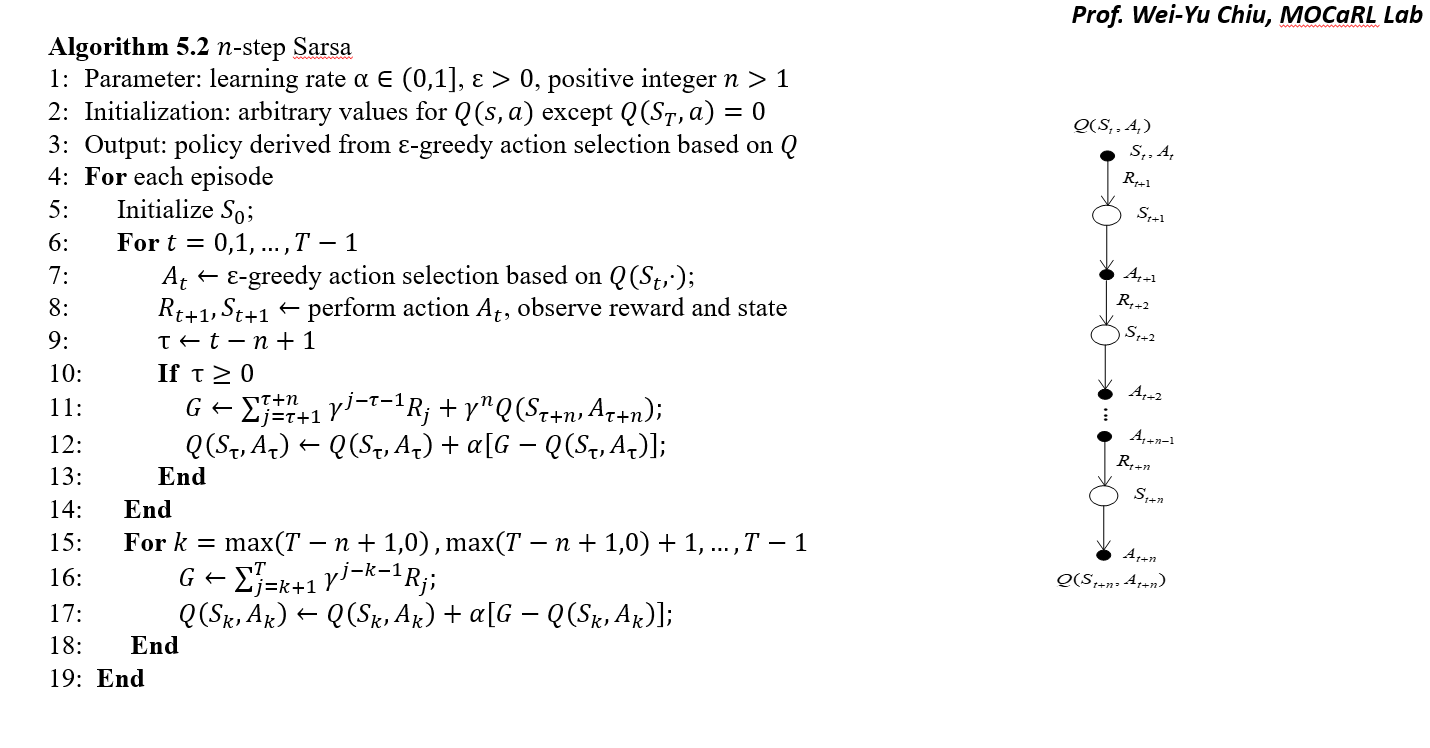

In [2]:
for k in range(6):
  if k <3:
    k = 0
  print(k)

0
0
0
3
4
5


In [3]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]


In [4]:
def step(state, action):
  state_n = (state + action).tolist()
  if state_n[0] < 0 or state_n[0] >= 10  or state_n[1] < 0 or state_n[1] >= 5:
    state_n = state
  if state_n[1] == 4:
    reward = -100
  else:
    reward = -1

  return state_n, reward

In [5]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][4-j])
      if data[i][4-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][4-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][4-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][4-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][4-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][4-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][4-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][4-j][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only

In [6]:
def sarsa5(n):

######## YOUR CODE HERE ########  
  returns = []
  q_value = rd.random([10,5,4])
  #St
  q_value[9][3] = 0
  epsilon = 0.3
  discount = 1
  alpha = 0.1
  ST = [9,3]
  S0 = [0,3]
  epis = 1000
  
  for _ in range(epis):
    t = -1
    state_action = []
    total_reward = 0
    state = S0
    if rd.rand() < epsilon:
        action = rd.randint(0,4)
    else:
        action = np.argmax(q_value[state[0]][state[1]])
    while state != ST:
      next_state, reward = step(state,ACTIONS[action])
      if rd.rand() < epsilon:
        next_action = rd.randint(0,4)
      else:
        next_action = np.argmax(q_value[next_state[0]][next_state[1]])
      total_reward += reward
      state_action.append([state,reward,action])#s0 r1 a0
      tou = t - n + 1
      if tou >= 0:
        k = tou + 1
        G = 0
        for num in range(k,tou + n + 1):
          G += discount**(num - tou - 1)*state_action[num - 1][1]
        G += discount ** n * q_value[next_state[0]][next_state[1]][next_action]
        q_value[state_action[tou][0][0]][state_action[tou][0][1]][state_action[tou][2]] = q_value[state_action[tou][0][0]][state_action[tou][0][1]][state_action[tou][2]] + alpha *(G - q_value[state_action[tou][0][0]][state_action[tou][0][1]][state_action[tou][2]])
      state = next_state
      action = next_action
      t += 1 # t = 9
    T = t + 1 # T = 10 total 9 arraies 
    #　6 7 8 9
    for count in range(T - n + 1,T):
      G = 0
      if count < 0:
        count = 0
      for j in range(count,T):
        # R7 R8 R9 R10
        G += discount**(j-count)*state_action[j][1]
    #-------------------------------------------------------------
        #print(G)
      q_value[state_action[count][0][0]][state_action[count][0][1]][state_action[count][2]] = q_value[state_action[count][0][0]][state_action[count][0][1]][state_action[count][2]] + alpha*(G - q_value[state_action[count][0][0]][state_action[count][0][1]][state_action[count][2]])
    returns.append(total_reward)
    '''
    psuedo code
    count = 6 7 8 9
    R1 R2 R3 R4 R5 R6 R7 R8 R9
    G = R7+R8+R9+R10 => state_action 6 7 8 9
    '''
####################################
    
  return returns, q_value

In [7]:
print()

# Result(60%):

Average 30 simulation, 1000 episode per simulation.

In [8]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

In [9]:
plot_reward_1 = []
plot_reward_2 = []
plot_reward_3 = []
plot_reward_4 = []
plot_reward_5 = []
for i in range(30):
  reward_1,q_value = sarsa5(1)
  
  reward_2,q_value = sarsa5(2)
  reward_3,q_value = sarsa5(3)
  reward_4,q_value = sarsa5(4)
  reward_5,q_value = sarsa5(5)
  plot_reward_1.append(averages(reward_1))
  plot_reward_2.append(averages(reward_2))
  plot_reward_3.append(averages(reward_3))
  plot_reward_4.append(averages(reward_4))
  plot_reward_5.append(averages(reward_5))


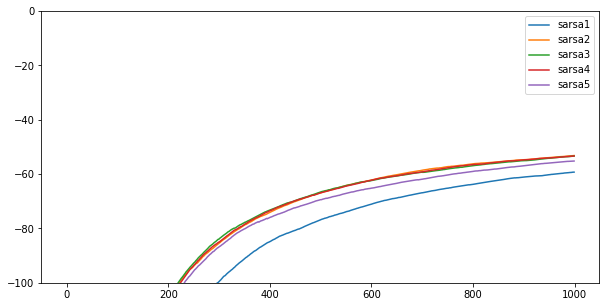

In [10]:
plt.figure(figsize=(10,5)) 


plt.plot(np.average(plot_reward_1,axis = 0),label = "sarsa1")
plt.plot(np.average(plot_reward_2,axis = 0),label = "sarsa2")
plt.plot(np.average(plot_reward_3,axis = 0),label = "sarsa3")
plt.plot(np.average(plot_reward_4,axis = 0),label = "sarsa4")
plt.plot(np.average(plot_reward_5,axis = 0),label = "sarsa5")
plt.ylim(-100, 0)

plt.legend()
plt.show()

number:  1
number:  2
number:  3
number:  4
number:  5
number:  6
number:  7
number:  8
number:  9
number:  10
number:  11
number:  12
number:  13
number:  14
number:  15
number:  16
number:  17
number:  18
number:  19
number:  20
number:  21
number:  22
number:  23
number:  24
number:  25
number:  26
number:  27
number:  28
number:  29
number:  30


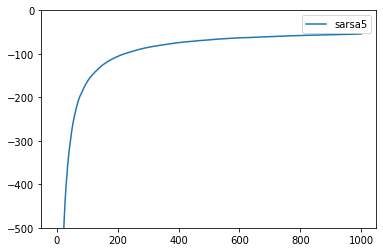

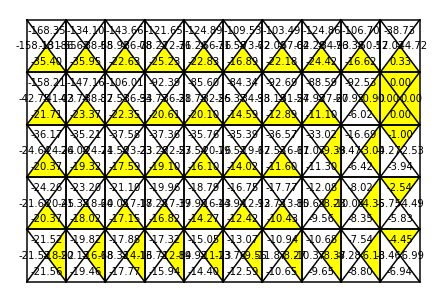

In [17]:
# sarsa 5
q_value_total = np.zeros([10,5,4])
plot_reward_5 = []
for i in range(30):
  reward,q_value = sarsa5(5)
  plot_reward_5.append(averages(reward))
  print("number: ", i + 1)
  q_value = np.array(q_value)
  q_value_total += q_value
q_value_total /= 30
plt.plot(np.average(plot_reward_5,axis = 0),label='sarsa5')
plt.ylim(-500, 0)
plt.legend()
plt.show()
drawTable(q_value_total)

In [12]:
def sarsa():
 
  returns = []
  q_value = rd.random([10,5,4])
  #St
  q_value[9][3] = 0
  epsilon = 0.3
  discount = 1
  alpha = 0.1
  ST = [9,3]
  epis = 1000
  
######## YOUR CODE HERE ########
  
  for _ in range(epis):
    total_reward = 0
    state = [0,3]
    action = -1
    if rd.random() < epsilon:
      action = rd.randint(0,4)
    else:
      action = np.argmax(q_value[state[0]][state[1]])
    while state != ST:
      next_state,reward = step(state,ACTIONS[action])
      #choose action-greedy from next_state
      next_action = -1
      if rd.random() < epsilon:
        next_action = rd.randint(0,4)
      else:
        next_action = np.argmax(q_value[next_state[0]][next_state[1]])
      q_value[state[0]][state[1]][action] += alpha * (reward + discount * q_value[next_state[0]][next_state[1]][next_action] - q_value[state[0]][state[1]][action])
      state = next_state
      action = next_action
      total_reward += reward
    returns.append(total_reward)
    
####################################
  return returns,q_value

number 0
number 1
number 2
number 3
number 4
number 5
number 6
number 7
number 8
number 9
number 10
number 11
number 12
number 13
number 14
number 15
number 16
number 17
number 18
number 19
number 20
number 21
number 22
number 23
number 24
number 25
number 26
number 27
number 28
number 29


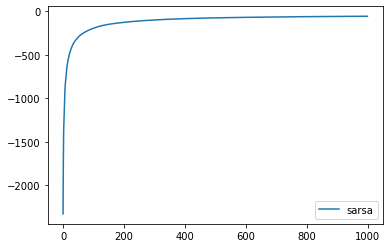

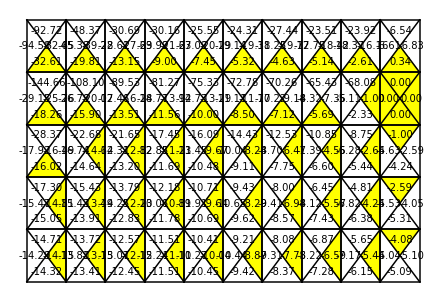

In [13]:
plot_reward_s = []
q_value_total_s = np.zeros([10,5,4])
for i in range(30):
  reward_s,q_value_s = sarsa()
  plot_reward_s.append(averages(reward_s))
  q_value_total_s += q_value_s
  print("number", i)
q_value_total_s /= 30
plt.plot(np.average(plot_reward_s,axis = 0),label = "sarsa")
plt.legend()
plt.show()
drawTable(q_value_total_s)

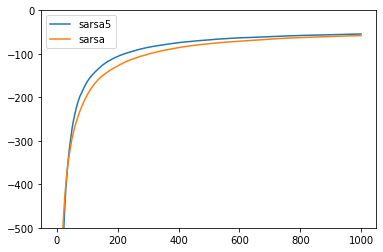

In [18]:
plt.plot(np.average(plot_reward_5,axis = 0),label='sarsa5')
plt.plot(np.average(plot_reward_s,axis = 0),label = "sarsa")
plt.ylim(-500, 0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the Q-values of Sarsa and 5-steps Sarsa, and explain your result.(15%)
2. Plot the average returns of Sarsa and 5-steps Sarsa, and explain your result(15%)
3. Varying n-steps and get average returns, then compare by overlap the plot(10%) 



>The report in PDF